In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl

In [10]:
data = pd.read_csv(r"http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data", header=None)

In [11]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [12]:
headers = ['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-locations','wheel-base',
          'length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio',
          'horsepower','peak-rpm','city-mpg','highway-mpg','price']

In [13]:
data.columns = headers

In [14]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-locations,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [15]:
data.to_csv(r"automobile_data.csv")

In [16]:
data.dtypes  # important to fix data to the right type

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-locations      object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [17]:
data.describe() # important for determining if normalization or scaling should be applied

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [18]:
data.describe(include='all') # top-most frequently occuring object, freq-the number of the top object appeared

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-locations,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,...,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-locations     205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

<h1>preprocessing</h1>: data cleaning, normalizing/scaling

In [20]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-locations,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [21]:
data.dropna(subset=['price'], axis=0,inplace=True)  # there should be no null value on price since thats what we aim to predict

In [22]:
len(data)

205

In [23]:
[f for f in data if data.price.isnull() is True] # there are no missing value in the price column

[]

In [24]:
[f for f in data if data.columns.isnull() is True]

[]

In [25]:
#data.dropna(subset=['normalized-losses'], axis=0)

In [26]:
data[data['normalized-losses']=="?"] # get all data where normalized losses is '?'

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-locations,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?
14,1,?,bmw,gas,std,four,sedan,rwd,front,103.5,...,164,mpfi,3.31,3.19,9.0,121,4250,20,25,24565
15,0,?,bmw,gas,std,four,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,30760
16,0,?,bmw,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315
17,0,?,bmw,gas,std,four,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182,5400,15,20,36880


In [27]:
#convert normalized-losses and price to float datatype
data['normalized-losses'] = pd.to_numeric(data['normalized-losses'], errors='coerce',downcast='integer')
# the coerce forces all values that are unconvertible to Nan. 'ignore' will simply ingnore. by default errors='raise'
# the downcast helps save memory by converting to int8

In [28]:
data['normalized-losses'].head()  # notice the '?' which are strings are converted to NaN

0      NaN
1      NaN
2      NaN
3    164.0
4    164.0
Name: normalized-losses, dtype: float64

In [29]:
data[data['price']=='?']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-locations,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?
44,1,NaN,isuzu,gas,std,two,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,?
45,0,NaN,isuzu,gas,std,four,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,?
129,1,NaN,porsche,gas,std,two,hatchback,rwd,front,98.4,...,203,mpfi,3.94,3.11,10.0,288,5750,17,28,?


In [30]:
data['price'] = pd.to_numeric(data['price'], errors='ignore', downcast='float')

In [31]:
data[data['price']=='?'] # notice the '?' where ignored

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-locations,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?
44,1,NaN,isuzu,gas,std,two,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,?
45,0,NaN,isuzu,gas,std,four,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,?
129,1,NaN,porsche,gas,std,two,hatchback,rwd,front,98.4,...,203,mpfi,3.94,3.11,10.0,288,5750,17,28,?


In [32]:
data['price'] = pd.to_numeric(data['price'], errors='coerce')

In [33]:
data[data['price']=='?'] # now they have been converted to Nan

C:\Users\me\AppData\Roaming\Python\Python37\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-locations,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


In [34]:
data[data['price'].isnull()] 

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-locations,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,NaN
44,1,NaN,isuzu,gas,std,two,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,NaN
45,0,NaN,isuzu,gas,std,four,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,NaN
129,1,NaN,porsche,gas,std,two,hatchback,rwd,front,98.4,...,203,mpfi,3.94,3.11,10.0,288,5750,17,28,NaN


In [35]:
data['price'].head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [36]:
# since the price is the target that will be predicted, it makes no sense to have null data, therefore, they should be removed
data.dropna(subset=['price'], inplace=True)
#data['price'].dropna(inplace=True)

In [37]:
len(data) # the data has been reduced to 201 because 4 price data were Null and has been dropped

201

# next we want to replace missing data by making some informed guess
# 1. replacing with the mean value of the category
# 2. replacing with the mean value of the column
# 3. replacing with the most frequent

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 26 columns):
symboling            201 non-null int64
normalized-losses    164 non-null float64
make                 201 non-null object
fuel-type            201 non-null object
aspiration           201 non-null object
num-of-doors         201 non-null object
body-style           201 non-null object
drive-wheels         201 non-null object
engine-locations     201 non-null object
wheel-base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb-weight          201 non-null int64
engine-type          201 non-null object
num-of-cylinders     201 non-null object
engine-size          201 non-null int64
fuel-system          201 non-null object
bore                 201 non-null object
stroke               201 non-null object
compression-ratio    201 non-null float64
horsepower           201 non-nu

In [39]:
data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-locations,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450.0
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250.0
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710.0
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920.0
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875.0
10,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.80,101,5800,23,29,16430.0


In [40]:
alfa = data[data['make']=='alfa-romero']

In [41]:
data['normalized-losses'].mean()

122.0

In [42]:
alfa

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-locations,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0


In [43]:
def exchange(row):
    if row['make'] == 'alfa-romero':
        return 121 
    else:
        pass

In [44]:
#data['normalized-losses'] = data.apply(lambda row: exchange(row), axis=1)

In [45]:
alfa.fillna(data['normalized-losses'].mean(), inplace=True)

C:\Users\me\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [46]:
alfa

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-locations,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0


In [47]:
_ = data.fillna(method='ffill', inplace=True) # filling NaN for each make with the most frequent value. 

In [48]:
data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-locations,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450.0
5,2,164.0,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250.0
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710.0
7,1,158.0,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920.0
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875.0
10,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.80,101,5800,23,29,16430.0


In [49]:
# alfa-romero remains unfilled
data.fillna(data['normalized-losses'].mean(), inplace=True)

In [50]:
data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-locations,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,128.267677,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495.0
1,3,128.267677,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500.0
2,1,128.267677,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500.0
3,2,164.000000,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950.0
4,2,164.000000,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450.0
5,2,164.000000,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250.0
6,1,158.000000,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710.0
7,1,158.000000,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920.0
8,1,158.000000,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875.0
10,2,192.000000,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.80,101,5800,23,29,16430.0


In [51]:
data.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-locations      object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [52]:
#data.astype() is used to convert  an object to a datatype of choice, e,g flaat, int or object
[f for f in data['horsepower']]

['111',
 '111',
 '154',
 '102',
 '115',
 '110',
 '110',
 '110',
 '140',
 '101',
 '101',
 '121',
 '121',
 '121',
 '182',
 '182',
 '182',
 '48',
 '70',
 '70',
 '68',
 '68',
 '102',
 '68',
 '68',
 '68',
 '102',
 '88',
 '145',
 '58',
 '76',
 '60',
 '76',
 '76',
 '76',
 '76',
 '86',
 '86',
 '86',
 '86',
 '101',
 '100',
 '78',
 '90',
 '176',
 '176',
 '262',
 '68',
 '68',
 '68',
 '68',
 '68',
 '101',
 '101',
 '101',
 '135',
 '84',
 '84',
 '84',
 '84',
 '64',
 '84',
 '120',
 '72',
 '123',
 '123',
 '123',
 '123',
 '155',
 '155',
 '184',
 '184',
 '175',
 '68',
 '68',
 '68',
 '102',
 '116',
 '88',
 '145',
 '145',
 '145',
 '88',
 '88',
 '116',
 '116',
 '69',
 '55',
 '69',
 '69',
 '69',
 '69',
 '69',
 '69',
 '69',
 '69',
 '97',
 '97',
 '152',
 '152',
 '152',
 '160',
 '200',
 '160',
 '97',
 '95',
 '97',
 '95',
 '95',
 '95',
 '95',
 '95',
 '97',
 '95',
 '142',
 '68',
 '102',
 '68',
 '68',
 '68',
 '88',
 '145',
 '143',
 '207',
 '207',
 '207',
 '?',
 '?',
 '110',
 '110',
 '110',
 '110',
 '160',
 '160',

In [53]:
# using astype couldn't convert the horsepower column to int bcos of the presence of '?'. 
# hence lets use the to_numeric 
data['horsepower'] = pd.to_numeric(data['horsepower'],errors="coerce")

<h1>NORMALIZATION:</h1> 
This is done so that the range of values will be consistent and have same inpact on the result.
# 1. simple feature scaling: xnew = x_old/x.max(). dividing each value of a column with the max value of that column. This makes the new values to range from zero to one. 
2. min-max: xnew = (x_old-x_min)/(x_max-x_min). the resulting value range btw zero and one.
3. z-score: xnew = (x_old-mean)/standard_deviation. the resulting values range btw -3 to +3.

In [54]:
# df['length'] = df['length']/df['length'].max()
#df['length'] = df['length']-df['length'].min())/(df['length'].max()-df['length'].min())
#df['length'] = (df['length']-df['length'].mean())/df['length'].std()

In [55]:
data.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-locations      object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower           float64
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [56]:
data.corr() # to know the parameters that are related to price(target to predict). from here we can choose the desired parameters
#for our machine learning algorithm and then normalize them if the need exist.

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,horsepower,city-mpg,highway-mpg,price
symboling,1.000000,0.379515,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.182196,0.076038,-0.035527,0.036233,-0.082391
normalized-losses,0.379515,1.000000,0.023444,0.151587,0.186929,-0.265020,0.200837,0.221485,-0.067283,0.318222,-0.299806,-0.254194,0.292210
wheel-base,-0.535987,0.023444,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.250313,0.371621,-0.470606,-0.543304,0.584642
length,-0.365404,0.151587,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.159733,0.580309,-0.665192,-0.698142,0.690628
width,-0.242423,0.186929,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.189867,0.615315,-0.633531,-0.680635,0.751265
height,-0.550160,-0.265020,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.259737,-0.087407,-0.049800,-0.104812,0.135486
curb-weight,-0.233118,0.200837,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.156433,0.758063,-0.749543,-0.794889,0.834415
engine-size,-0.110581,0.221485,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.028889,0.822713,-0.650546,-0.679571,0.872335
compression-ratio,-0.182196,-0.067283,0.250313,0.159733,0.189867,0.259737,0.156433,0.028889,1.000000,-0.214576,0.331425,0.268465,0.071107
horsepower,0.076038,0.318222,0.371621,0.580309,0.615315,-0.087407,0.758063,0.822713,-0.214576,1.000000,-0.822617,-0.804596,0.810533


horsepower, engine-size, curb-weight, width, length, wheel-base, normalized-losses

In [57]:
data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-locations',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [58]:
X = data[['horsepower','engine-size','curb-weight','wheel-base', 'length', 'width','normalized-losses']]

In [59]:
Y = data['price']

In [60]:
X

,horsepower,engine-size,curb-weight,wheel-base,length,width,normalized-losses
0,111.0,130,2548,88.6,168.8,64.1,128.267677
1,111.0,130,2548,88.6,168.8,64.1,128.267677
2,154.0,152,2823,94.5,171.2,65.5,128.267677
3,102.0,109,2337,99.8,176.6,66.2,164.000000
4,115.0,136,2824,99.4,176.6,66.4,164.000000
5,110.0,136,2507,99.8,177.3,66.3,164.000000
6,110.0,136,2844,105.8,192.7,71.4,158.000000
7,110.0,136,2954,105.8,192.7,71.4,158.000000
8,140.0,131,3086,105.8,192.7,71.4,158.000000
10,101.0,108,2395,101.2,176.8,64.8,192.000000


curb weight is in the range on thousands, width in in range on tens and the others are in the range on 100. 
Not normalizing this data may cause some bias were the curb weigth will have a greater influence on the price becos of its higher range of values.
So lets normalize their values

In [61]:
X['horsepower'] = X['horsepower']/X['horsepower'].max()

C:\Users\me\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [62]:
X['engine-size'] = X['engine-size']/X['engine-size'].max()

C:\Users\me\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [63]:
X.loc[:,'curb-weight'] = X['curb-weight']/X['curb-weight'].max()

C:\Users\me\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [64]:
X['wheel-base'] = X['wheel-base']/X['wheel-base'].max()

C:\Users\me\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [65]:
X['width'] = X['width']/X['width'].max()
X['length'] = X['length']/X['length'].max()
X['normalized-losses'] = X['normalized-losses']/X['normalized-losses'].max()

C:\Users\me\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\me\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\me\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.or

In [66]:
X

,horsepower,engine-size,curb-weight,wheel-base,length,width,normalized-losses
0,0.423664,0.398773,0.626660,0.732837,0.811148,0.890278,0.501046
1,0.423664,0.398773,0.626660,0.732837,0.811148,0.890278,0.501046
2,0.587786,0.466258,0.694294,0.781638,0.822681,0.909722,0.501046
3,0.389313,0.334356,0.574766,0.825476,0.848630,0.919444,0.640625
4,0.438931,0.417178,0.694540,0.822167,0.848630,0.922222,0.640625
5,0.419847,0.417178,0.616576,0.825476,0.851994,0.920833,0.640625
6,0.419847,0.417178,0.699459,0.875103,0.925997,0.991667,0.617188
7,0.419847,0.417178,0.726513,0.875103,0.925997,0.991667,0.617188
8,0.534351,0.401840,0.758977,0.875103,0.925997,0.991667,0.617188
10,0.385496,0.331288,0.589031,0.837055,0.849592,0.900000,0.750000


<h1>Binning:</h1> This is done during preprocessing and may help imporove the accuracy of a model.
Numerical values are grouped into bins to form categorical values, this gives a better understanding of the data distribution.

In [67]:
Y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
5      15250.0
6      17710.0
7      18920.0
8      23875.0
10     16430.0
11     16925.0
12     20970.0
13     21105.0
14     24565.0
15     30760.0
16     41315.0
17     36880.0
18      5151.0
19      6295.0
20      6575.0
21      5572.0
22      6377.0
23      7957.0
24      6229.0
25      6692.0
26      7609.0
27      8558.0
28      8921.0
29     12964.0
30      6479.0
        ...   
175     9988.0
176    10898.0
177    11248.0
178    16558.0
179    15998.0
180    15690.0
181    15750.0
182     7775.0
183     7975.0
184     7995.0
185     8195.0
186     8495.0
187     9495.0
188     9995.0
189    11595.0
190     9980.0
191    13295.0
192    13845.0
193    12290.0
194    12940.0
195    13415.0
196    15985.0
197    16515.0
198    18420.0
199    18950.0
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 201, dtype: float64

In [68]:
data['price'].min()

5118.0

In [69]:
data['price'].max()

45400.0

In [70]:
bins = np.linspace(min(data['price']), max(data['price']), 4) # get 4 numbers to use as dividers that are equal numbers apart

In [71]:
[b for b in bins]

[5118.0, 18545.333333333336, 31972.666666666668, 45400.0]

In [72]:
group_names = ['low', 'medium', 'high']

In [73]:
#to segment and cut the values into bins
data['price_binned']= pd.cut(data['price'], bins, labels=group_names, include_lowest=True)

In [74]:
%matplotlib inline
import seaborn as sns

In [75]:
data[['price_binned','price']].head(10)

,price_binned,price
0,low,13495.0
1,low,16500.0
2,low,16500.0
3,low,13950.0
4,low,17450.0
5,low,15250.0
6,low,17710.0
7,medium,18920.0
8,medium,23875.0
10,low,16430.0


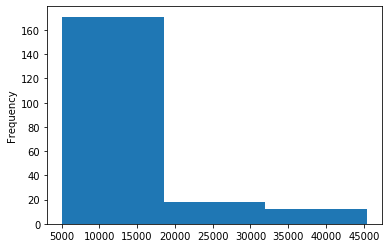

In [76]:
data['price'].plot.hist(by=['price_binned'], bins=3)

<h1>Categorical->Numerical:</h1> one-hot encoding

In [77]:
data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-locations,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,price_binned
0,3,128.267677,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.00,111.0,5000,21,27,13495.0,low
1,3,128.267677,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.00,111.0,5000,21,27,16500.0,low
2,1,128.267677,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.00,154.0,5000,19,26,16500.0,low
3,2,164.000000,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.00,102.0,5500,24,30,13950.0,low
4,2,164.000000,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.00,115.0,5500,18,22,17450.0,low
5,2,164.000000,audi,gas,std,two,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,8.50,110.0,5500,19,25,15250.0,low
6,1,158.000000,audi,gas,std,four,sedan,fwd,front,105.8,...,mpfi,3.19,3.40,8.50,110.0,5500,19,25,17710.0,low
7,1,158.000000,audi,gas,std,four,wagon,fwd,front,105.8,...,mpfi,3.19,3.40,8.50,110.0,5500,19,25,18920.0,medium
8,1,158.000000,audi,gas,turbo,four,sedan,fwd,front,105.8,...,mpfi,3.13,3.40,8.30,140.0,5500,17,20,23875.0,medium
10,2,192.000000,bmw,gas,std,two,sedan,rwd,front,101.2,...,mpfi,3.50,2.80,8.80,101.0,5800,23,29,16430.0,low


In [78]:
#lets convert fuel type to numerical values
data['fuel-type'].unique()

array(['gas', 'diesel'], dtype=object)

In [79]:
# to convert these category variables to dummy variables (1, 0)
pd.get_dummies(data['fuel-type'])

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
6,0,1
7,0,1
8,0,1
10,0,1


lets build a muiltiple linear regression model capable of predicting price of used cars.
In this case lets use the numerical value of price as our target

<h1>choosing a model</h1>

In [80]:
from sklearn.linear_model import LinearRegression

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
# lets split the data randomly into training and testing data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

In [83]:
x_train

,horsepower,engine-size,curb-weight,wheel-base,length,width,normalized-losses
166,0.427481,0.300613,0.565667,0.781638,0.810668,0.888889,0.656250
78,0.259542,0.282209,0.492868,0.775021,0.755887,0.894444,0.628906
3,0.389313,0.334356,0.574766,0.825476,0.848630,0.919444,0.640625
190,0.343511,0.334356,0.546237,0.781638,0.796252,0.888889,1.000000
144,0.312977,0.331288,0.586572,0.802316,0.826526,0.908333,0.398438
132,0.419847,0.371166,0.653714,0.819686,0.896684,0.923611,0.585938
85,0.335878,0.374233,0.581653,0.796526,0.828448,0.908333,0.488281
92,0.263359,0.297546,0.476636,0.781638,0.794330,0.886111,0.476562
99,0.370229,0.368098,0.571569,0.803970,0.833253,0.905556,0.414062
114,0.362595,0.466258,0.857108,0.944582,0.955790,0.950000,0.628906


In [84]:
y_train

166     9538.0
78      6669.0
3      13950.0
190     9980.0
144     9233.0
132    11850.0
85      6989.0
92      6849.0
99      8949.0
114    17075.0
60      8495.0
47     32250.0
153     6918.0
84     14489.0
93      7349.0
161     8358.0
204    22625.0
11     16925.0
21      5572.0
170    11199.0
13     21105.0
17     36880.0
122     7609.0
88      9279.0
48     35550.0
188     9995.0
113    16695.0
189    11595.0
192    13845.0
195    13415.0
        ...   
133    12170.0
163     8058.0
136    18150.0
111    15580.0
159     7788.0
134    15040.0
89      5499.0
96      7499.0
141     7126.0
148     8013.0
61     10595.0
63     10795.0
110    13860.0
147    10198.0
203    22470.0
35      7295.0
15     30760.0
69     28176.0
56     11845.0
101    13499.0
184     7995.0
97      7999.0
142     7775.0
180    15690.0
82     12629.0
90      7099.0
106    18399.0
70     31600.0
25      6692.0
8      23875.0
Name: price, Length: 140, dtype: float64

In [85]:
model1 = LinearRegression()

In [86]:
# lets fit the train data into linear model. That is training the data
model1.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [87]:
# lets see the intercept of the linear model
model1.intercept_ # this is the value of price of the car when all the other variables are 0
# this doesn't make sense and could be misleadinge because it is not possible for all the other parameters to be absent.
# hence we can't have a model with no parameters.

-69241.27111628104

In [88]:
X.columns

Index(['horsepower', 'engine-size', 'curb-weight', 'wheel-base', 'length',
       'width', 'normalized-losses'],
      dtype='object')

In [89]:
# lets see the coefficient parameters
coef = pd.DataFrame(model1.coef_, index=['horsepower', 'engine-size', 'curb-weight', 'wheel-base', 'length',
       'width', 'normalized-losses'], columns=['coefficients'])

In [90]:
coef

,coefficients
horsepower,14513.245922
engine-size,26269.119024
curb-weight,1785.949210
wheel-base,31483.040812
length,-19082.795475
width,58894.445811
normalized-losses,3631.457215


# a coef=0, means the parameter has no relationship with the target response
# in this case all the parameters above have a relationship with price
# however length has a negative effect on price. This means that one unit increase in the length of the car, will lead to 19082 decreas in price.
# before we continue interpreting the model, lets validate the accuracy of the model


<h1>Predictions:</h1>

In [91]:
#model1.predict(x_test) this causes an error therefore had to drop null values present in the test data, we also have to drop the target values of the Na


In [92]:
x_test.head()

,horsepower,engine-size,curb-weight,wheel-base,length,width,normalized-losses
80,0.442748,0.337423,0.582882,0.796526,0.831331,0.908333,0.597656
173,0.351145,0.374233,0.572061,0.846981,0.843825,0.923611,0.253906
186,0.324427,0.334356,0.559518,0.804797,0.825084,0.909722,0.367188
115,0.370229,0.368098,0.756272,0.892473,0.897165,0.950000,0.628906
158,0.213740,0.337423,0.559518,0.791563,0.799135,0.894444,0.355469


In [93]:
x_test['price'] = y_test

C:\Users\me\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [94]:
x_test.head()

,horsepower,engine-size,curb-weight,wheel-base,length,width,normalized-losses,price
80,0.442748,0.337423,0.582882,0.796526,0.831331,0.908333,0.597656,9959.0
173,0.351145,0.374233,0.572061,0.846981,0.843825,0.923611,0.253906,8948.0
186,0.324427,0.334356,0.559518,0.804797,0.825084,0.909722,0.367188,8495.0
115,0.370229,0.368098,0.756272,0.892473,0.897165,0.950000,0.628906,16630.0
158,0.213740,0.337423,0.559518,0.791563,0.799135,0.894444,0.355469,7898.0


In [95]:
x_test.dropna(inplace= True)

C:\Users\me\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [96]:
y_test = x_test['price']

In [97]:
len(y_test)

59

In [98]:
x_test.columns

Index(['horsepower', 'engine-size', 'curb-weight', 'wheel-base', 'length',
       'width', 'normalized-losses', 'price'],
      dtype='object')

In [99]:
x_test = x_test[['horsepower', 'engine-size', 'curb-weight', 'wheel-base', 'length',
       'width', 'normalized-losses']]

In [100]:
predictions1 = model1.predict(x_test)

In [101]:
# lets get the residual. the residual is the error present in the predicted response
residual = y_test - predictions1

In [102]:
residual.mean()

-173.50573897028147

bias exist in the model if the residual has an overall positive of negative mean. 
The constant (intercept) can prevent this bias by forcing the residual mean to equal zero. 
Although this doesn't seem to work here. however, thats one of the importance of having the intercept in your model

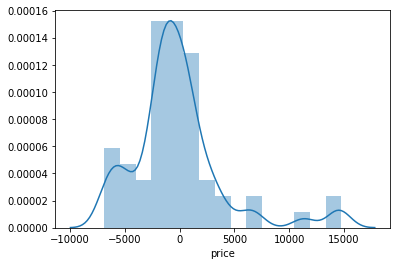

In [103]:
sns.distplot(residual) # a normal distribution indicates that the model did well

In [104]:
# lets see the actual response vs the predicted response
response = {'Actual':y_test, 'Predicted':predictions1}

In [105]:
output = pd.DataFrame(response)

In [106]:
output # the model makes predictions that are too high or too low

,Actual,Predicted
80,9959.0,11968.344904
173,8948.0,12588.039016
186,8495.0,9753.297105
115,16630.0,16363.154817
158,7898.0,7363.648498
55,10945.0,8227.853732
172,17669.0,15282.454221
179,15998.0,22921.547166
157,7198.0,7099.290205
49,36000.0,42064.708226


In [107]:
# the residual sum of squares is the variance that was not removed by the model
RSS = sum(residual**2)

In [108]:
RSS # this is very high, the model isn't doing well

1079331607.0151923

In [109]:
# lets calculate the residual standard error:
# RSE is an estimate of the deviation of the standard deviation from the inherent error of the data
RSE = np.sqrt((1/(59-2))* RSS)

In [110]:
RSE # this is extremely large. this means the model does not fit the data

4351.510338760177

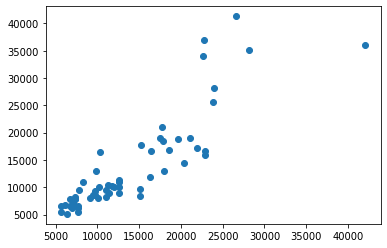

In [111]:
plt = pl # this was because matplotlib was imported as pl and i want it as plt
plt.scatter(predictions1, y_test)
# from the plot, if we were to add a line, you would notice there are alot of outliers

lets calculate the R_stat.
an R_stat of 1 means that much of the variance was explained/removed by the model


In [112]:
# first lets calculate the total sum of squares. this is the deviation inherent in the data
mean_test = np.mean(y_test)
TSS = sum((y_test-mean_test)**2)

In [113]:
TSS # the data seems to have a lot of variance. this bias may be due to the absence of other parameters in the model or some errors in preprocessing

4418634761.728812

In [114]:
# a difference btw the variance in the data and variance that was not removed by the regression gives the variance that was removed by the model
#R_stat is used to estimate the accuracy of the model
R_stat = (TSS-RSS)/TSS

In [115]:
R_stat

0.7557318798187116

In [116]:
# the accuracy of the model is 75.6%

<h1>MODEL2:</h1> the model1 with fewer independent parameters is only 75% accurate.
    Lets build another model with more parameters to see if this would have a better accuracy and less error

<h1>EXPLORATORY DATA ANALYSIS</h1>
what are the characteristics that have the most impact on the car price? <br>
> Descriptive statistics.<br>
> Grouping data.<br>
> ANOVA: analysis of variance.<br>
> Correlation.<br>
> Advanced correlation.<br>

<h2>Descriptive statistics</h2>

In [117]:
data # processed data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-locations,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,price_binned
0,3,128.267677,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.00,111.0,5000,21,27,13495.0,low
1,3,128.267677,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.00,111.0,5000,21,27,16500.0,low
2,1,128.267677,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.00,154.0,5000,19,26,16500.0,low
3,2,164.000000,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.00,102.0,5500,24,30,13950.0,low
4,2,164.000000,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.00,115.0,5500,18,22,17450.0,low
5,2,164.000000,audi,gas,std,two,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,8.50,110.0,5500,19,25,15250.0,low
6,1,158.000000,audi,gas,std,four,sedan,fwd,front,105.8,...,mpfi,3.19,3.40,8.50,110.0,5500,19,25,17710.0,low
7,1,158.000000,audi,gas,std,four,wagon,fwd,front,105.8,...,mpfi,3.19,3.40,8.50,110.0,5500,19,25,18920.0,medium
8,1,158.000000,audi,gas,turbo,four,sedan,fwd,front,105.8,...,mpfi,3.13,3.40,8.30,140.0,5500,17,20,23875.0,medium
10,2,192.000000,bmw,gas,std,two,sedan,rwd,front,101.2,...,mpfi,3.50,2.80,8.80,101.0,5800,23,29,16430.0,low


In [118]:
data.dropna(axis=0, inplace=True) # drop na left on the data

In [119]:
data.describe(include='all') # NaN- not a number

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-locations,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,price_binned
count,199.000000,199.000000,199,199,199,199,199,199,199,199.000000,...,199,199,199,199.000000,199.000000,199,199.000000,199.000000,199.000000,199
unique,NaN,NaN,21,2,2,3,5,3,2,NaN,...,8,39,37,NaN,NaN,22,NaN,NaN,NaN,3
top,NaN,NaN,toyota,gas,std,four,sedan,fwd,front,NaN,...,mpfi,3.62,3.40,NaN,NaN,4800,NaN,NaN,NaN,low
freq,NaN,NaN,32,179,163,112,94,116,196,NaN,...,90,23,19,NaN,NaN,36,NaN,NaN,NaN,169
mean,0.839196,127.687452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.824121,...,NaN,NaN,NaN,10.178995,103.396985,NaN,25.201005,30.683417,13243.432161,NaN
std,1.257009,39.039334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.090838,...,NaN,NaN,NaN,4.022424,37.553843,NaN,6.451826,6.849410,7978.707609,NaN
min,-2.000000,65.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,NaN,NaN,NaN,7.000000,48.000000,NaN,13.000000,16.000000,5118.000000,NaN
25%,0.000000,95.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,NaN,NaN,NaN,8.550000,70.000000,NaN,19.000000,25.000000,7775.000000,NaN
50%,1.000000,122.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,NaN,NaN,NaN,9.000000,95.000000,NaN,24.000000,30.000000,10345.000000,NaN
75%,2.000000,153.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,NaN,NaN,NaN,9.400000,116.000000,NaN,30.000000,34.000000,16501.500000,NaN


In [120]:
# count categorical variables like drive-wheels
drive_wheel_count = data['drive-wheels'].value_counts()

In [121]:
drive_wheel_count

fwd    116
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

In [122]:
drive_wheel_count.index.name = 'drive_wheel'
drive_wheel_count.rename(columns={'drive_wheels':'value_count'}, inplace=True)

drive_wheel
fwd    116
rwd     75
4wd      8
dtype: int64

In [123]:
pd.DataFrame(drive_wheel_count)

,0
drive_wheel,
fwd,116
rwd,75
4wd,8


In [124]:
data['make'].value_counts()

toyota           32
nissan           18
mazda            17
honda            13
mitsubishi       13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
saab              6
audi              6
porsche           4
chevrolet         3
jaguar            3
alfa-romero       3
isuzu             2
mercury           1
Name: make, dtype: int64

# box plots: can be use to compare btw groups (descrete values)
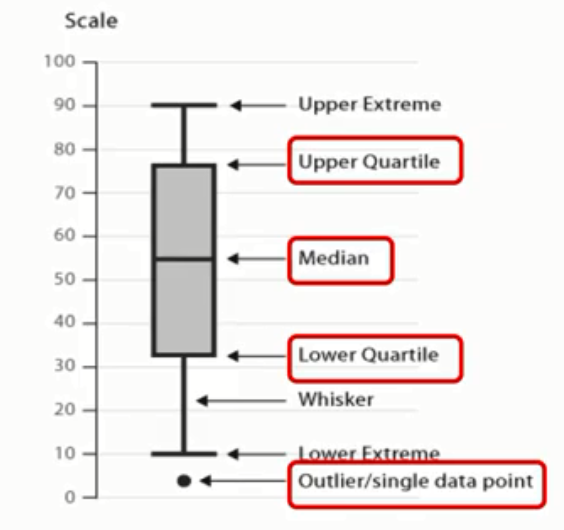

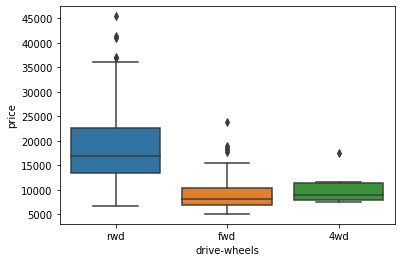

In [125]:
sns.boxplot(x='drive-wheels', y='price', data=data)

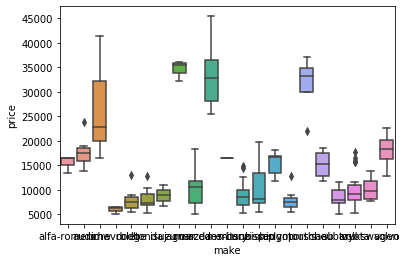

In [126]:
sns.boxplot(x='make', y='price', data=data)

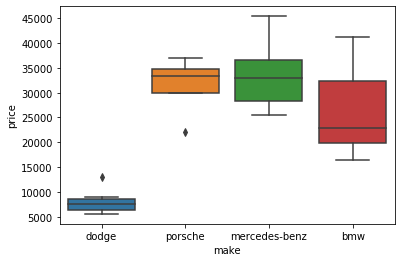

In [127]:
sns.boxplot(x='make', y='price', data=data, order=['dodge','porsche','mercedes-benz','bmw'])

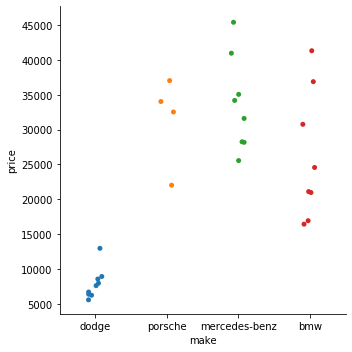

In [128]:
sns.catplot(x='make', y='price', data=data, order=['dodge','porsche','mercedes-benz','bmw'])

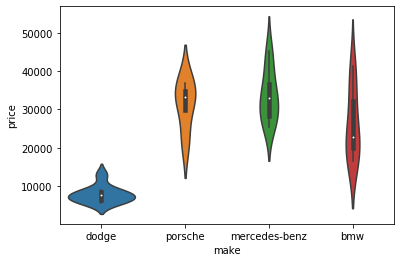

In [129]:
sns.violinplot(x='make', y='price', data=data, order=['dodge','porsche','mercedes-benz','bmw'])

# scatter plot can be use on continous variables

Text(0, 0.5, 'price')

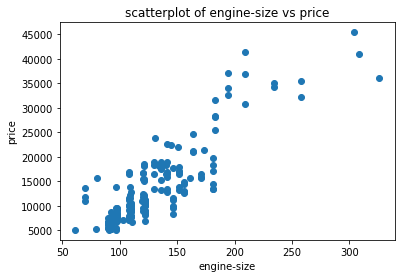

In [130]:
# to find relationship btw the dependent (target) and independent(predictor). 
# target should be on the y-axis and predictor on the x-axis
plt.scatter(x='engine-size', y='price', data=data)
# there is a linear r/s bcos price tends to increase with increase in engine-size
plt.title("scatterplot of engine-size vs price")
plt.xlabel('engine-size')
plt.ylabel('price')

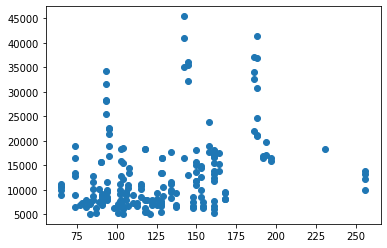

In [131]:
plt.scatter(x='normalized-losses', y='price', data=data) # this is weird, no wonder it has a negative coefficient in the model1.
# will have to decide if it is a good predictor variable

# grouping: for categorical variables

In [132]:
# show the price of cars base of their makes
df_make = data[['make', 'price']]
df_grpmake = df_make.groupby('make', as_index=False).mean()

In [133]:
df_grpmake

,make,price
0,alfa-romero,15498.333333
1,audi,17859.166667
2,bmw,26118.750000
3,chevrolet,6007.000000
4,dodge,7875.444444
5,honda,8184.692308
6,isuzu,8916.500000
7,jaguar,34600.000000
8,mazda,10652.882353
9,mercedes-benz,33647.000000


In [134]:
# show the price of cars base on their drive-wheels and body-style
df_test = data[['drive-wheels', 'body-style','price']]
df_testgrp = df_test.groupby(['drive-wheels','body-style'],as_index=False).mean()

In [135]:
df_testgrp

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8365.166667
6,fwd,sedan,9811.800000
7,fwd,wagon,10061.181818
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [136]:
# a pivot table can be use to visualize the groupings better
# pivot the body-style as columns and the drive-wheel along the rows
df_pivot= df_testgrp.pivot(index='drive-wheels', columns='body-style')


In [137]:
df_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8365.166667   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd           10061.181818  
rwd           16994.222222

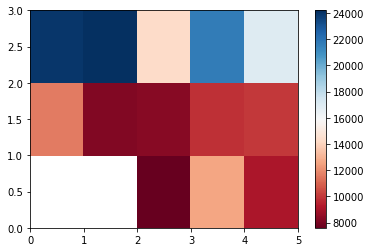

In [138]:
# Heatmap: plots target variable over multiple variable by increasing the color intensity of the target variable wrt to its quantity
plt.pcolor(df_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

<h1>ANOVA:</h1> use to find correlation btw different groups of a categorical variable.
* f-test score: variation btw sample group means divided by variatio within sample group.
* p-value: confidence degree

In [139]:
data['make'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [140]:
# anova btw Honda and subaru
df_anova = data[['make', 'price']]

In [141]:
group_anova = df_anova.groupby(['make'])

In [142]:
import scipy.stats as stats

In [143]:
anova_results_l = stats.f_oneway(group_anova.get_group('honda')['price'], group_anova.get_group('subaru')['price'])

In [144]:
anova_results_l #ANOVA results: F=0.19744031275, pvalue=0.660947824

F_onewayResult(statistic=0.19744030127462606, pvalue=0.6609478240622193)

In [145]:
# anova btw honda and jaguar
anova_results_J = stats.f_oneway(group_anova.get_group('honda')['price'], group_anova.get_group('jaguar')['price'])

In [146]:
anova_results_J

F_onewayResult(statistic=400.925870564337, pvalue=1.0586193512077862e-11)

# Correlation:
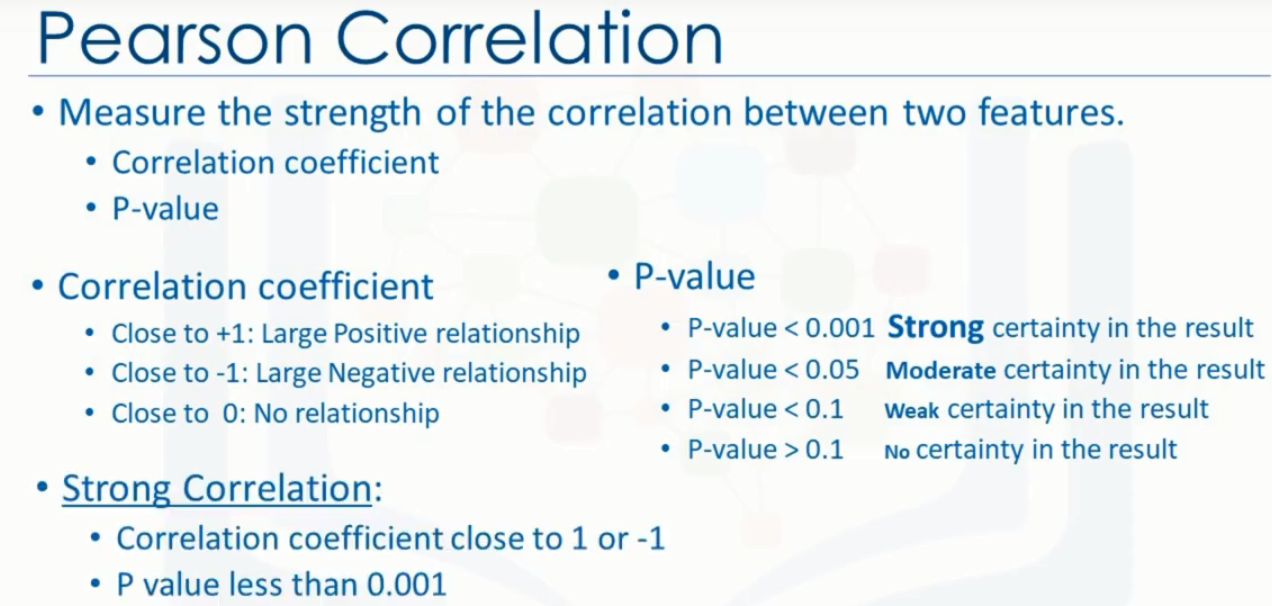
p-value to significance value a : the risk of concluding that a correlation exist when no correlation actually exist.
 a p-value less than the significant value is means that the correlation is far from zero 

(0, 56030.72553237341)

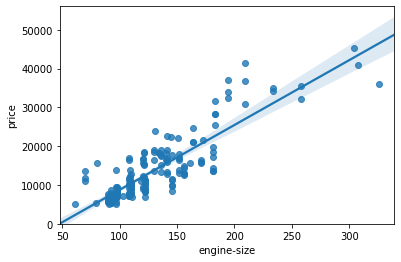

In [147]:
# correlation btw two features (engine-size and price)
sns.regplot(x='engine-size', y='price', data=data)
plt.ylim(0) # so the plot can start from 0

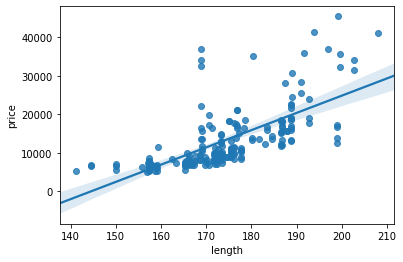

In [148]:
sns.regplot(x='length', y='price', data=data) # length has a positive correlation but notice that it has a negative coefficient on model1

In [149]:
data.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,horsepower,city-mpg,highway-mpg,price
symboling,1.000000,0.383070,-0.537706,-0.365957,-0.243933,-0.546717,-0.232893,-0.111110,-0.182446,0.076038,-0.035228,0.036293,-0.082465
normalized-losses,0.383070,1.000000,0.030409,0.147386,0.184374,-0.263744,0.204133,0.222108,-0.062583,0.318222,-0.298213,-0.257707,0.302594
wheel-base,-0.537706,0.030409,1.000000,0.879582,0.817145,0.592809,0.782636,0.573197,0.249088,0.371621,-0.472877,-0.543647,0.583797
length,-0.365957,0.147386,0.879582,1.000000,0.857225,0.494880,0.881688,0.685260,0.161486,0.580309,-0.664865,-0.699033,0.693965
width,-0.243933,0.184374,0.817145,0.857225,1.000000,0.309223,0.866965,0.729466,0.191254,0.615315,-0.633139,-0.681131,0.753871
height,-0.546717,-0.263744,0.592809,0.494880,0.309223,1.000000,0.307881,0.075569,0.259914,-0.087407,-0.051387,-0.105200,0.134990
curb-weight,-0.232893,0.204133,0.782636,0.881688,0.866965,0.307881,1.000000,0.849301,0.156294,0.758063,-0.750287,-0.794937,0.835090
engine-size,-0.111110,0.222108,0.573197,0.685260,0.729466,0.075569,0.849301,1.000000,0.029366,0.822713,-0.650552,-0.679688,0.873887
compression-ratio,-0.182446,-0.062583,0.249088,0.161486,0.191254,0.259914,0.156294,0.029366,1.000000,-0.214576,0.330587,0.268819,0.069549
horsepower,0.076038,0.318222,0.371621,0.580309,0.615315,-0.087407,0.758063,0.822713,-0.214576,1.000000,-0.822617,-0.804596,0.810533


(0, 48277.17855945218)

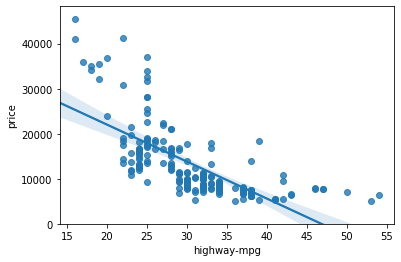

In [150]:
sns.regplot(x='highway-mpg', y='price', data=data) # negative correlation
plt.ylim(0,)

In [151]:
data['peak-rpm'] = pd.to_numeric(data['peak-rpm'], errors='coerce') # had to convert it to numeric otherwise regplot will throw an error

(0, 47436.208930621644)

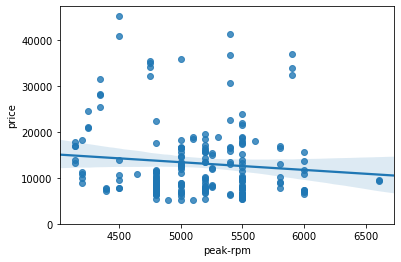

In [152]:
sns.regplot(x='peak-rpm', y='price', data=data) # shows a weak correlation hence it peak-rpm cannot be use to predict price
plt.ylim(0,)

In [153]:
data[['peak-rpm','price']].corr(method='pearson') # the correlation type can also be change to pearson or spearman

,peak-rpm,price
peak-rpm,1.000000,-0.101649
price,-0.101649,1.000000


In [154]:
# lets use the scipy stats module to calculate the correlatio btw horsepower and price. 
pearson_coef, p_value = stats.pearsonr(data['peak-rpm'], data['price'])

In [155]:
pearson_coef, p_value  # we see that the p-value is greater than 0.1 which means there is no cetainty in the result. i.e there may not exist any correlation btw both parameters

(-0.10164886620219901, 0.15311824317199588)

In [156]:
pearson_coef, p_value = stats.pearsonr(data['horsepower'], data['price'])

In [157]:
pearson_coef, p_value # the p-value is far smaller than 0.001, hence we are very certain of this value 

(0.8105330821322063, 1.1891278276946011e-47)

# Residual plots: # A residual plots will help tell us if the data is linear or not. the first parameter is the independent variable while the second is the dependent

<h1>MODEL DEVELOPMENT</h1>

In [158]:
# in this model, lets use all the parameters that have either a negative or positive correlation with our predictor 'price'

In [159]:
[f for f in data.corr()]


['symboling',
 'normalized-losses',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'price']

In [160]:
x = data[['symboling',
 'normalized-losses',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',]]

In [161]:
y = data['price']

In [162]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [163]:
model2 = LinearRegression()

In [164]:
# lets split the data to training and testing data
x_train, x_test,y_train,  y_test = train_test_split(x, y, test_size=0.3, random_state=42) 

In [165]:
# lets fit the training data to creat a linearmodel. 
lm = model2.fit(x_train, y_train)

In [166]:
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [167]:
# lets see the intercept
lm.intercept_  # Again we should read the intercept alone because its not possible to evaluate the price of a car when the car has no features, in otherwords when there is no car

-57384.62845991482

In [168]:
# lets see the parameters coefficients
lm.coef_

array([ 388.99281032,   14.68042388,  186.9568405 ,  -35.681649  ,
        305.49569231,  297.8537358 ,   -0.98949295,  100.47255416,
        248.29636944,   35.94668595,    1.30906691, -340.01308688,
        170.21707053])

In [169]:
# lets name these parameters and place them in a table
coefficients = pd.DataFrame(lm.coef_, columns=['coef paramters'], index=['symboling',
 'normalized-losses',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg'])

In [170]:
coefficients

,coef paramters
symboling,388.992810
normalized-losses,14.680424
wheel-base,186.956841
length,-35.681649
width,305.495692
height,297.853736
curb-weight,-0.989493
engine-size,100.472554
compression-ratio,248.296369
horsepower,35.946686


In [171]:
# lets test the model using the test data
prediction2 = lm.predict(x_test)

In [172]:
prediction2

array([10723.79774082, 26104.59667166, 19252.5621053 , 11384.63367887,
        9187.29865217, 14852.37957381, 27991.77994967, 23533.45648622,
       12456.67798129, 22260.30005977, 10470.8117992 ,  6664.77354123,
       23210.91832852,  7329.72216778,  7632.12383894, 10631.04214931,
       11695.8591661 , 12050.14758345,  6658.83787719, 11038.35347112,
       28772.43397457, 25208.49976914, 11136.06945246, 21959.86669108,
       22224.74767925, 15367.5180722 ,  6106.97978043, 13798.49965656,
        5021.54981739, 15119.01660318, 14774.99441345, 30325.73007209,
       15755.86939107, 14725.7244756 , 20890.40499456, 25500.67375191,
       15169.98472166, 25208.49976914,  7633.53294681, 11272.75926121,
       11361.89683882,  9805.85725554,  6624.72374952,  9154.85320737,
        9250.67936314,  1919.24389426,  4244.88076562,  9530.03215262,
       14066.59820994,  6415.56054992, 11278.19530483, 16446.59000293,
       19228.52915477, 18486.59181849,  7462.90287338,  9592.09565364,
      

In [173]:
# lets create a table containing the predicted value and the actual value
output = {'predicted':prediction2, 'actual':y_test}
output_check = pd.DataFrame(output)

In [174]:
output_check

,predicted,actual
85,10723.797741,6989.0
16,26104.596672,41315.0
114,19252.562105,17075.0
183,11384.633679,7975.0
79,9187.298652,7689.0
169,14852.379574,9989.0
71,27991.779950,34184.0
70,23533.456486,31600.0
123,12456.677981,8921.0
179,22260.300060,15998.0


# Distribution plots

In [175]:
# we can see that this model does well on some of the data and poorly on others
# lets calculate the residual to really judge our model
residual2 = (y_test-prediction2)

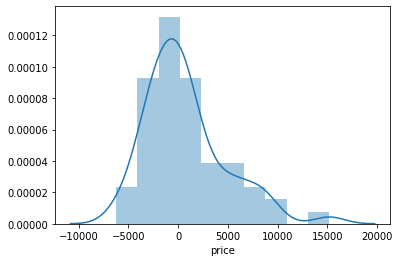

In [176]:
sns.distplot(residual2) # this is normal distribution so the model is appropriate

In [197]:
# lets see how the model fit the train data
predict_train = lm.predict(x_train)

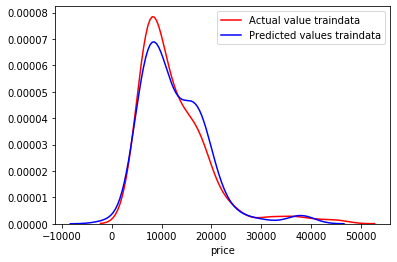

In [198]:
# lets see how the model fit the train data using the training data
actual = sns.distplot(y_train, hist=False, color='r', label='Actual value traindata')
# lets now show a dist containing both the actual and predicted
sns.distplot(predict_train, hist=False, color='b', label='Predicted values traindata', ax=actual)

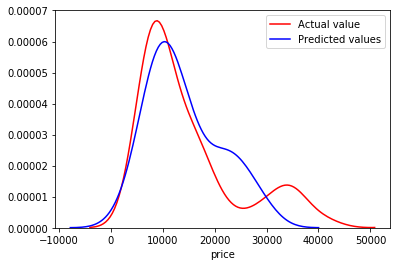

In [199]:
# lets see how the model will perform in real life using the test data
# lets get a distribution instead of a histogram, since hist are for discrete value 
actual = sns.distplot(y_test, hist=False, color='r', label='Actual value')
# lets now show a dist containing both the actual and predicted
sns.distplot(prediction2, hist=False, color='b', label='Predicted values', ax=actual)

In [178]:
# from the above plot, we can see that the model fails in predicted prices above 40,000. Does well for prices range of -5000 to 20000,
# and a bit close for price range og 20000 to 40000. this show the model will lack in this aspect when use on life data

In [179]:
residual2.mean() # we expect a zero mean as this will indicate no bias

697.633136731829

In [180]:
#lets see if this model does better than model1 by calculating the R statistic.
# remember that R statistic measure the proportion of variation the model is able to remove from the data

In [181]:
# residual sum of squares
RSS2 = sum((residual2)**2) # this is the variance not removed by the model
mean_test = np.mean(y_test)
TSS = sum((y_test-mean_test)**2) # this is the variance present in the data

In [182]:
R_stat2 = (TSS-RSS2)/TSS

In [183]:
R_stat2 # this is relatively better than model1 which was approx .75

0.811046485013061

In [192]:
lm.score(x_test,y_test)  # calculate r_stat

0.8110464850130611

In [193]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,prediction2)

16852976.356882963

In [184]:
# how do we know when adding a parameter is not overfitting the model. Because adding more data will relatively improve R_stats.
#How do we peanalize for adding more data?
# we can use the R_adjustment. adding data will also result to increase in R-adj but it can never go beyond 1 and will certainly
# starts to drop when when data or parameters that are not correlated with the target parameter is used to fit the model.

In [185]:
adjusted_r_squared = 1 - (1-R_stat2)*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)
adjusted_r_squared

0.7913953194544193

In [188]:
adjusted_r_squared_model1 = 1 - (1-R_stat)*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)
adjusted_r_squared_model1

0.7303279953198576

In [189]:
preprocess_data = data.to_csv("preprocessed_data.csv")

Residual plot: we can know if a linear model is appropriate for fitting our data by using a residplot.
The residuals is plotted in the y-axis while the predictor variable or fitted values is plotted on the x-axis

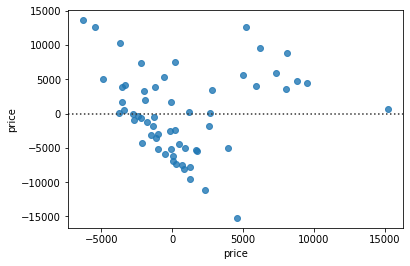

In [191]:
sns.residplot(residual2, y_test)

the plot has a zero mean, its distributed evenly around the x axis with similar variance; no curvature.
Hence the assumption of using a linear model to fit the data is correct.
Having a distribution as below indicates that the model is incorrect,
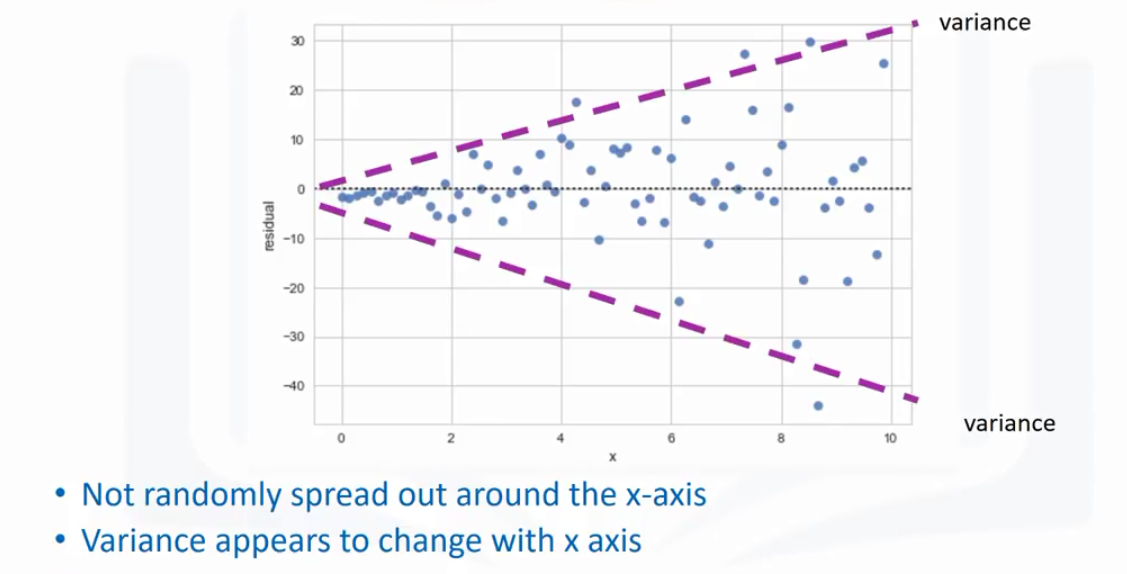